In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# LOADING AND SPLITTING DATASET INTO TRAINING AND TEST VALUES

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [6]:
#training values are initially in 2D hence the reshape
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

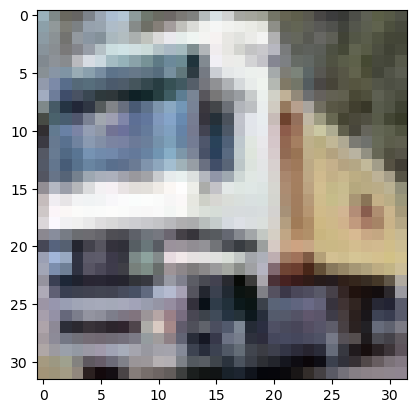

In [7]:
plt.imshow(x_train[1])

In [8]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index]) 
    plt.xlabel(classes[y[index]])

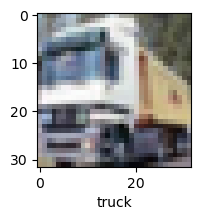

In [9]:
plot_sample(x_train,y_train,1)
plt.show()

In [10]:
#To normalize the data
x_train = x_train/255
x_test = x_test/255

#  BUILDING AND TRAINING OUR CONVOLUTION NEURAL NETWORK

In [55]:
#CNN is used instead of ANN because CNN favors computer vision related problems.

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax'), #softmax will normalize probabilities
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(x_train, y_train, batch_size=20, epochs=10)

Epoch 1/10
2500/2500 [==============================] - 14s 5ms/step - loss: 1.5111 - accuracy: 0.4540
Epoch 2/10
2500/2500 [==============================] - 13s 5ms/step - loss: 1.1896 - accuracy: 0.5772
Epoch 3/10
2500/2500 [==============================] - 13s 5ms/step - loss: 1.0632 - accuracy: 0.6246
Epoch 4/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.9886 - accuracy: 0.6541
Epoch 5/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.9212 - accuracy: 0.6792
Epoch 6/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.8718 - accuracy: 0.6923
Epoch 7/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.8196 - accuracy: 0.7116
Epoch 8/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.7877 - accuracy: 0.7197
Epoch 9/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.7489 - accuracy: 0.7329
Epoch 10/10
2500/2500 [==============================] - 13s 5ms/step - l

In [56]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9529 - accuracy: 0.6833


[0.9528831839561462, 0.6833000183105469]

In [12]:
#To visualize the architecture of the CNN
import visualkeras

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

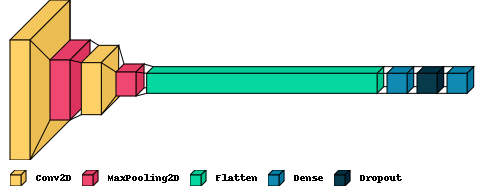

In [17]:
visualkeras.layered_view(cnn, legend=True)

In [70]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [90]:
y_classes = [np.argmax(element) for element in y_pred]

In [72]:
print(classification_report(y_classes, y_test))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1086
           1       0.84      0.78      0.81      1075
           2       0.61      0.51      0.56      1194
           3       0.44      0.54      0.49       815
           4       0.53      0.70      0.61       755
           5       0.69      0.54      0.60      1276
           6       0.77      0.74      0.75      1034
           7       0.75      0.71      0.73      1058
           8       0.79      0.83      0.81       950
           9       0.66      0.87      0.75       757

    accuracy                           0.68     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [80]:
#Comparing first 11 y_test values with y_classes
print(y_classes[:10])
y_test = y_test.reshape(-1,)
print(y_test[:10])

[3, 1, 1, 0, 6, 6, 1, 2, 3, 1]
[3 8 8 0 6 6 1 6 3 1]


# Actual plot vs predicted classes

automobile


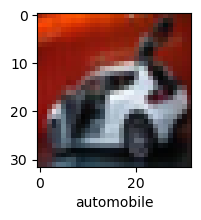

In [82]:
plot_sample(x_test,y_test,6) 
print(classes[y_classes[6]])

cat


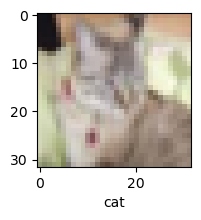

In [93]:
print(classes[y_classes[8]])
plot_sample(x_test, y_test, 8)